# Step 1: Preprocessing 

In [656]:
#Import Libraries and Dependencies 
import pandas as pd
import datetime
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler 

In [657]:
# Import CSV and Convert to DataFrame 
df1 = pd.read_csv(Path('/Users/kristenmaskery/Desktop/CrimeStoppers/Resources/crime_rate.csv'))
df1=pd.DataFrame(df1)
df1.tail()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId
206430,-8.855354e+06,5.426936e+06,206214,GO-20191554251,2019/08/13 04:00:00+00,2019/08/16 04:00:00+00,Outside,2135,210,Theft Of Motor Vehicle,...,225.0,Tuesday,17,Auto Theft,D31,21,Humber Summit (21),43.750652,-79.549,206431
206431,-8.847784e+06,5.416596e+06,206215,GO-20191535011,2019/08/13 04:00:00+00,2019/08/13 04:00:00+00,Commercial,2135,210,Theft Of Motor Vehicle,...,225.0,Tuesday,14,Auto Theft,D12,111,Rockcliffe-Smythe (111),43.683521,-79.481,206432
206432,-8.857803e+06,5.428142e+06,206216,GO-20191534561,2019/08/13 04:00:00+00,2019/08/13 04:00:00+00,Outside,2135,210,Theft Of Motor Vehicle,...,225.0,Tuesday,13,Auto Theft,D31,21,Humber Summit (21),43.758480,-79.571,206433
206433,-8.850567e+06,5.415343e+06,206217,GO-20191536931,2019/08/13 04:00:00+00,2019/08/13 04:00:00+00,Outside,2135,210,Theft Of Motor Vehicle,...,225.0,Tuesday,11,Auto Theft,D12,111,Rockcliffe-Smythe (111),43.675377,-79.506,206434
206434,-8.849009e+06,5.421924e+06,206218,GO-20191539696,2019/08/13 04:00:00+00,2019/08/14 04:00:00+00,House,2135,210,Theft Of Motor Vehicle,...,225.0,Tuesday,22,Auto Theft,D12,29,Maple Leaf (29),43.718124,-79.492,206435


In [658]:
#Drop Unnesccesary Columns in Crime Df 
df1.drop('X', axis=1, inplace=True)
df1.drop('Y', axis=1, inplace=True)
df1.drop('reporteddate', axis=1, inplace=True)
df1.drop('premisetype', axis=1, inplace=True)
df1.drop('ucr_code', axis=1, inplace=True)
df1.drop('ucr_ext', axis=1, inplace=True)
df1.drop('Index_', axis=1, inplace=True)
df1.drop('event_unique_id', axis=1, inplace=True)
df1.drop('occurrencedayofyear', axis=1, inplace=True)
df1.drop('reportedmonth', axis=1, inplace=True)
df1.drop('reportedday', axis=1, inplace=True)
df1.drop('reporteddayofyear', axis=1, inplace=True)
df1.drop('reporteddayofweek', axis=1, inplace=True)
df1.drop('reportedhour', axis=1, inplace=True)
df1.drop('occurrenceyear', axis=1, inplace=True)
df1.drop('Division', axis=1, inplace=True)
df1.drop('Hood_ID', axis=1, inplace=True)
df1.drop('Neighbourhood', axis=1, inplace=True)
df1.drop('Lat', axis=1, inplace=True)
df1.drop('Long', axis=1, inplace=True)
df1.drop('MCI', axis=1, inplace=True)
df1.drop('ObjectId', axis=1, inplace=True)
df1.drop('offence', axis=1, inplace=True)
df1

,occurrencedate,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,occurrencehour
0,2014/01/07 05:00:00+00,2014,January,7.0,Tuesday,22
1,2014/01/07 05:00:00+00,2014,January,7.0,Tuesday,22
2,2014/01/07 05:00:00+00,2014,January,7.0,Tuesday,22
3,2014/01/07 05:00:00+00,2014,January,7.0,Tuesday,22
4,2014/01/07 05:00:00+00,2014,January,7.0,Tuesday,21
...,...,...,...,...,...,...
206430,2019/08/13 04:00:00+00,2019,August,13.0,Tuesday,17
206431,2019/08/13 04:00:00+00,2019,August,13.0,Tuesday,14
206432,2019/08/13 04:00:00+00,2019,August,13.0,Tuesday,13
206433,2019/08/13 04:00:00+00,2019,August,13.0,Tuesday,11


In [659]:
#Strip Date Column 
df1['occurrencedate'] = df1['occurrencedate'].map(lambda x: str(x)[:+10])
df1

,occurrencedate,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,occurrencehour
0,2014/01/07,2014,January,7.0,Tuesday,22
1,2014/01/07,2014,January,7.0,Tuesday,22
2,2014/01/07,2014,January,7.0,Tuesday,22
3,2014/01/07,2014,January,7.0,Tuesday,22
4,2014/01/07,2014,January,7.0,Tuesday,21
...,...,...,...,...,...,...
206430,2019/08/13,2019,August,13.0,Tuesday,17
206431,2019/08/13,2019,August,13.0,Tuesday,14
206432,2019/08/13,2019,August,13.0,Tuesday,13
206433,2019/08/13,2019,August,13.0,Tuesday,11


In [660]:
#Rename Occurence Column to merge with df2
df1 = df1.rename({'occurrencedate': 'Date'}, axis=1)
df1 = df1.rename({'occurrencehour':'hour_num'}, axis=1)          
df1.head()

,Date,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,hour_num
0,2014/01/07,2014,January,7.0,Tuesday,22
1,2014/01/07,2014,January,7.0,Tuesday,22
2,2014/01/07,2014,January,7.0,Tuesday,22
3,2014/01/07,2014,January,7.0,Tuesday,22
4,2014/01/07,2014,January,7.0,Tuesday,21


In [661]:
# convert the 'Date' column to datetime format
df1['Date'] = pd.to_datetime(df1['Date'], infer_datetime_format=True)
df1
#set start and end date for years we want to keep
start_date = '01-08-2014'
end_date = '11-14-2018'
#Add them to the df2
mask = (df1['Date'] > start_date) & (df1['Date'] <= end_date)
df1 = df1.loc[mask]
df1
#convert occurenceday column to integer
df1['occurrenceday'] = df1['occurrenceday'].astype(int)
df1.dtypes

Date                   datetime64[ns]
reportedyear                    int64
occurrencemonth                object
occurrenceday                   int64
occurrencedayofweek            object
hour_num                        int64
dtype: object

In [662]:
#read in temperature data 
df2 = pd.read_csv(Path('/Users/kristenmaskery/Desktop/CrimeStoppers/Resources/Toronto_temp_clean.csv'))
df2=pd.DataFrame(df2)
df2

,Date_,Year_,Month_,Day_,Mean_temp,Total_Precip,Season,Rain,Snow
0,2018-01-31,"2,018",1,31,-7.0,1.0,Winter,No,Yes
1,2018-01-30,"2,018",1,30,-11.0,0.0,Winter,No,No
2,2018-01-29,"2,018",1,29,-4.0,5.0,Winter,No,Yes
3,2018-01-28,"2,018",1,28,1.0,0.0,Winter,No,No
4,2018-01-27,"2,018",1,27,5.0,2.0,Winter,Yes,No
...,...,...,...,...,...,...,...,...,...
2884,1941-12-01,1941,12,1,-1.5,41.1,Winter,Yes,Yes
2885,1940-12-01,1940,12,1,-3.6,82.6,Winter,Yes,Yes
2886,1939-12-01,1939,12,1,NaN,NaN,Winter,No,No
2887,1938-12-01,1938,12,1,-2.5,27.4,Winter,Yes,Yes


In [663]:
#Rename Date_ Column to merge with df1
df2 = df2.rename({'Date_': 'Date'}, axis=1)
df2.head()

,Date,Year_,Month_,Day_,Mean_temp,Total_Precip,Season,Rain,Snow
0,2018-01-31,"2,018",1,31,-7.0,1.0,Winter,No,Yes
1,2018-01-30,"2,018",1,30,-11.0,0.0,Winter,No,No
2,2018-01-29,"2,018",1,29,-4.0,5.0,Winter,No,Yes
3,2018-01-28,"2,018",1,28,1.0,0.0,Winter,No,No
4,2018-01-27,"2,018",1,27,5.0,2.0,Winter,Yes,No


In [664]:
#Convert Date column to date time 
df2['Date'] = pd.to_datetime(df2['Date']) 
df2.head()
#set start and end date for years we want to keep
start_date = '01-08-2014'
end_date = '01-01-2019'
#Add them to the df2
mask = (df2['Date'] > start_date) & (df2['Date'] <= end_date)
df2 = df2.loc[mask]
#Sort Values from 2014 to 2018
df2.sort_values(by=['Date'], inplace=True, ascending=True)
df2

,Date,Year_,Month_,Day_,Mean_temp,Total_Precip,Season,Rain,Snow
146,2014-01-09,"2,014",1,9,-11.0,0.0,Winter,No,No
145,2014-01-10,"2,014",1,10,-3.0,3.0,Winter,Yes,Yes
144,2014-01-11,"2,014",1,11,4.0,8.0,Winter,Yes,No
143,2014-01-12,"2,014",1,12,1.0,0.0,Winter,No,No
142,2014-01-13,"2,014",1,13,4.0,1.0,Winter,Yes,No
...,...,...,...,...,...,...,...,...,...
2422,2018-11-10,"2,018",11,10,0.0,0.0,Fall,No,No
2421,2018-11-11,"2,018",11,11,1.0,0.0,Fall,No,No
2420,2018-11-12,"2,018",11,12,4.0,1.0,Fall,Yes,No
2419,2018-11-13,"2,018",11,13,-1.0,1.0,Fall,Yes,No


In [665]:
#Export cleaned DataFrames
df1.to_csv('final_clean_crime_rate.csv', index = False)
df2.to_csv('cleaned_temp_rate.csv', index = False)

In [666]:
#Merge df1 & df2 on date column
merged_df = pd.merge(left=df1, right=df2, how='left', left_on='Date', right_on='Date')
merged_df

,Date,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,hour_num,Year_,Month_,Day_,Mean_temp,Total_Precip,Season,Rain,Snow
0,2014-01-09,2014,January,9,Thursday,11,"2,014",1,9,-11.0,0.0,Winter,No,No
1,2014-01-16,2014,January,16,Thursday,0,"2,014",1,16,-3.0,2.0,Winter,No,Yes
2,2014-01-16,2014,January,16,Thursday,2,"2,014",1,16,-3.0,2.0,Winter,No,Yes
3,2014-01-16,2014,January,16,Thursday,17,"2,014",1,16,-3.0,2.0,Winter,No,Yes
4,2014-01-16,2014,January,16,Thursday,19,"2,014",1,16,-3.0,2.0,Winter,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162091,2018-11-14,2018,November,14,Wednesday,11,"2,018",11,14,-2.0,0.0,Fall,No,No
162092,2018-11-14,2018,November,14,Wednesday,22,"2,018",11,14,-2.0,0.0,Fall,No,No
162093,2018-11-14,2018,November,14,Wednesday,19,"2,018",11,14,-2.0,0.0,Fall,No,No
162094,2018-11-14,2018,November,14,Wednesday,20,"2,018",11,14,-2.0,0.0,Fall,No,No


In [670]:
#Clean merged df 
merged_df.drop('Year_', axis=1, inplace=True)
merged_df.drop('Day_', axis=1, inplace=True)
merged_df.drop('Month_', axis=1, inplace=True)
merged_df.drop('Date', axis=1, inplace=True)


merged_df

KeyError: "['Year_'] not found in axis"

In [ ]:
#Create Instance of Label Encoder
label_encoder = LabelEncoder()

In [ ]:
#Fit the Label Encoder 
label_encoder.fit(merged_df["Season"])

In [ ]:
# List the Encoded Classes
list(label_encoder.classes_)
# Encode the Seasons as an Integer
merged_df["Seasons"] = label_encoder.transform(merged_df["Season"])
merged_df.head()
#Seasons Dictionary
seasons_num = {
    "Fall": 1,
    "Spring": 2,
    "Summer": 3,
    "Winter": 4,
}
#Add Months Dictionary to DataFrame
merged_df["Seasons_Num"] = merged_df["Season"].apply(lambda x: seasons_num[x])
merged_df.head()

In [ ]:
#Drop Seasons Column 
merged_df.drop(["Season", "Seasons"], axis=1, inplace=True)
merged_df.head()

In [ ]:
#Create Second Instance of Label Encoder
label_encoder = LabelEncoder()
#Fit the Label Encoder 
label_encoder.fit(merged_df["MCI"])

In [ ]:
# List the Encoded Classes
list(label_encoder.classes_)
# Encode the MCI's as an Integer
merged_df["Offences_Type"] = label_encoder.transform(merged_df["MCI"])
merged_df.head()

In [ ]:
#MCI Dictionary
Offences_num = {
    "Assault": 1,
    "Auto Theft": 2,
    "Break and Enter": 3,
    "Robbery": 4,
    "Theft Over":5,
}
#Add MCI Dictionary to DataFrame
merged_df["Offences_type"] = merged_df["MCI"].apply(lambda x: Offences_num[x])
merged_df.head()
# Drop MCI & Offences_Type Columns 
merged_df.drop(["MCI", "Offences_Type"], axis=1, inplace=True)
merged_df.head()

In [ ]:
#Create Instance of Label Encoder
label_encoder = LabelEncoder()
#Fit the Label Encoder 
label_encoder.fit(merged_df["occurrencedayofweek"])
# List the Encoded Classes
list(label_encoder.classes_)
# Encode the weekday as an Integer
merged_df["Day_Of_Week"] = label_encoder.transform(merged_df["occurrencedayofweek"])
merged_df.head()

In [671]:
#Weekday Dictionary
Week_day_num = {
    "Monday    ": 1,
    "Tuesday   ": 2,
    "Wednesday ": 3,
    "Thursday  ": 4,
    "Friday    ": 5,
    "Saturday  ": 6,
    "Sunday    ": 7,
}
#Add Months Dictionary to DataFrame
merged_df["Day_Of_Week"] = merged_df["occurrencedayofweek"].apply(lambda x: Week_day_num[x])
merged_df.head()
#Drop columns
merged_df.drop(["occurrencedayofweek"], axis=1, inplace=True)
merged_df.head()

,reportedyear,occurrencemonth,occurrenceday,hour_num,Mean_temp,Total_Precip,Season,Rain,Snow,Day_Of_Week
0,2014,January,9,11,-11.0,0.0,Winter,No,No,4
1,2014,January,16,0,-3.0,2.0,Winter,No,Yes,4
2,2014,January,16,2,-3.0,2.0,Winter,No,Yes,4
3,2014,January,16,17,-3.0,2.0,Winter,No,Yes,4
4,2014,January,16,19,-3.0,2.0,Winter,No,Yes,4


In [672]:
#Create Instance of Label Encoder
label_encoder = LabelEncoder()
#Fit the Label Encoder 
label_encoder.fit(merged_df["occurrencemonth"])
# List the Encoded Classes
list(label_encoder.classes_)
# Encode the weekday as an Integer
merged_df["Month"] = label_encoder.transform(merged_df["occurrencemonth"])
merged_df.head()

,reportedyear,occurrencemonth,occurrenceday,hour_num,Mean_temp,Total_Precip,Season,Rain,Snow,Day_Of_Week,Month
0,2014,January,9,11,-11.0,0.0,Winter,No,No,4,4
1,2014,January,16,0,-3.0,2.0,Winter,No,Yes,4,4
2,2014,January,16,2,-3.0,2.0,Winter,No,Yes,4,4
3,2014,January,16,17,-3.0,2.0,Winter,No,Yes,4,4
4,2014,January,16,19,-3.0,2.0,Winter,No,Yes,4,4


In [673]:
#Month Dictionary
months_num = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12,
}
#Add Months Dictionary to DataFrame
merged_df["Month"] = merged_df["occurrencemonth"].apply(lambda x: months_num[x])
merged_df.head()
#Drop columns
merged_df.drop(["occurrencemonth"], axis=1, inplace=True)
merged_df.head()

,reportedyear,occurrenceday,hour_num,Mean_temp,Total_Precip,Season,Rain,Snow,Day_Of_Week,Month
0,2014,9,11,-11.0,0.0,Winter,No,No,4,1
1,2014,16,0,-3.0,2.0,Winter,No,Yes,4,1
2,2014,16,2,-3.0,2.0,Winter,No,Yes,4,1
3,2014,16,17,-3.0,2.0,Winter,No,Yes,4,1
4,2014,16,19,-3.0,2.0,Winter,No,Yes,4,1


In [674]:
#Dummy Encoding the Rain & Snow Columns
temp_binary_encoded_df = pd.get_dummies(merged_df, columns=["Rain", "Snow"])
temp_binary_encoded_df.head()

,reportedyear,occurrenceday,hour_num,Mean_temp,Total_Precip,Season,Day_Of_Week,Month,Rain_No,Rain_Yes,Snow_No,Snow_Yes
0,2014,9,11,-11.0,0.0,Winter,4,1,1,0,1,0
1,2014,16,0,-3.0,2.0,Winter,4,1,1,0,0,1
2,2014,16,2,-3.0,2.0,Winter,4,1,1,0,0,1
3,2014,16,17,-3.0,2.0,Winter,4,1,1,0,0,1
4,2014,16,19,-3.0,2.0,Winter,4,1,1,0,0,1


In [675]:
# Saving the encoded dataset
temp_binary_encoded_df.to_csv('temp_binary_encoded_df.csv', index = False)

In [676]:
#Create a DataFrame of the Aggregate Crime Rate 
crime_month = pd.DataFrame(temp_binary_encoded_df.Month.value_counts().reset_index().values, columns=["Month", "AggregateCrime"])
crime_month_index = crime_month.sort_index(axis = 0, ascending=True)
crime_rate_index

,Day_Of_Week,AggregateCrime
0,5,24648
1,6,24370
2,7,23533
3,4,22759
4,3,22433
5,1,22364
6,2,21989


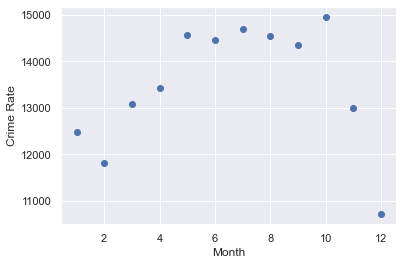

In [677]:
#Visualize Correlation betweeen Aggregate Crime Rate and Month
plt.scatter(crime_month_index.Month, crime_month_index.AggregateCrime)
plt.xlabel('Month') 
plt.ylabel('Crime Rate')
plt.show()

In [678]:
#Test Accuracy of Correlation Using Pearson's Correlation Coefficient 
pearsoncorr = crime_month_index.corr(method='pearson')
pearsoncorr 

,Month,AggregateCrime
Month,1.000000,0.087221
AggregateCrime,0.087221,1.000000


In [679]:
#Create a DataFrame of the Aggregate Crime Rate by Day of the Week 
Week_rate = pd.DataFrame(temp_binary_encoded_df.Day_Of_Week.value_counts().reset_index().values, columns=["Day_Of_Week", "AggregateCrime"])
Week_rate_index = Week_rate.sort_index(axis = 0, ascending=True)
Week_rate_index

,Day_Of_Week,AggregateCrime
0,5,24648
1,6,24370
2,7,23533
3,4,22759
4,3,22433
5,1,22364
6,2,21989


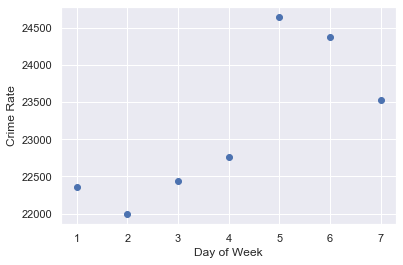

In [680]:
#Visualize Correlation betweeen Aggregate Crime Rate and Day of the Week 
plt.scatter(Week_rate_index.Day_Of_Week, Week_rate_index.AggregateCrime)
plt.xlabel('Day of Week') 
plt.ylabel('Crime Rate')
plt.show()

In [681]:
#Test Accuracy of Correlation Using Pearson's Correlation Coefficient 
pearsoncorr_week = Week_rate_index.corr(method='pearson')
pearsoncorr_week

,Day_Of_Week,AggregateCrime
Day_Of_Week,1.000000,0.776441
AggregateCrime,0.776441,1.000000


In [682]:
#Create a DataFrame of the Aggregate Crime Rate by Hour (24hr) 
hour_rate = pd.DataFrame(temp_binary_encoded_df.hour_num.value_counts().reset_index().values, columns=["Hour", "AggregateCrime"])
hour_crime_rate_index = hour_rate.sort_index(axis = 0, ascending=True)
hour_crime_rate_index.head()


,Hour,AggregateCrime
0,0,10403
1,12,9092
2,21,8788
3,18,8741
4,20,8651


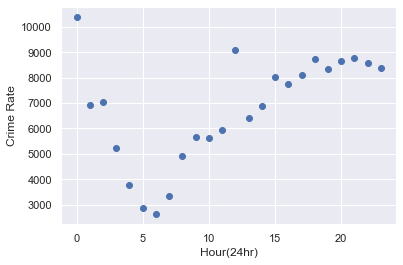

In [683]:
#Visualize Correlation betweeen Aggregate Crime Rate and Hour (24hr) 
plt.scatter(hour_crime_rate_index.Hour, hour_crime_rate_index.AggregateCrime)
plt.xlabel('Hour(24hr)') 
plt.ylabel('Crime Rate')
plt.show()

In [684]:
#Test Accuracy of Correlation Using Pearson's Correlation Coefficient 
pearsoncorr_hour = hour_crime_rate_index.corr(method='pearson')
pearsoncorr_hour

,Hour,AggregateCrime
Hour,1.000000,0.514109
AggregateCrime,0.514109,1.000000


In [685]:
#Create a DataFrame of the Aggregate Crime Rate by Temperature
Temp_rate = pd.DataFrame(temp_binary_encoded_df.Mean_temp.value_counts().reset_index().values, columns=["Mean_temp", "AggregateCrime"])
temp_crime_rate_index = Temp_rate.sort_index(axis = 0, ascending=True)
temp_crime_rate_index.head()


,Mean_temp,AggregateCrime
0,22.0,7197.0
1,17.0,6234.0
2,19.0,6151.0
3,20.0,6126.0
4,21.0,5994.0


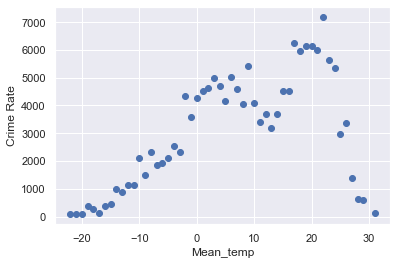

In [686]:
#Visualize Correlation betweeen Aggregate Crime Rate and Temperature 
plt.scatter(temp_crime_rate_index.Mean_temp, temp_crime_rate_index.AggregateCrime)
plt.xlabel('Mean_temp') 
plt.ylabel('Crime Rate')
plt.show()

In [687]:
#Test Accuracy of Correlation Using Pearson's Correlation Coefficient 
pearsoncorr_temp = temp_crime_rate_index.corr(method='pearson')
pearsoncorr_temp

,Mean_temp,AggregateCrime
Mean_temp,1.000000,0.570894
AggregateCrime,0.570894,1.000000


# Step 2: Apply Machine Learning Models

In [688]:
#Analyze the Correlation Between Mean Temperature and Crime Count Using a Linear Regression Model 
#Assign X and Y Variables 
X = temp_crime_rate_index.Mean_temp.values.reshape(-1, 1)
y = temp_crime_rate_index.AggregateCrime.values.reshape(-1, 1)
#Show Variable Shape
X.shape
y.shape

(53, 1)

In [689]:
#Train, Test,and Split the Data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [690]:
#Create an Instance of the Linear Regression Model
model = LinearRegression()

In [691]:
# Fit/Train the Model
model.fit(X, y)

LinearRegression()

In [692]:
#Use Predict() Method to Generate Predictions
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_test.shape)

(11, 1)
(11, 1)


In [693]:
#Show the Actual Versus Predicted Values 
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,597.0,4957.233357
1,2108.0,2366.059256
2,1127.0,1832.582236
3,2106.0,1985.004242
4,4698.0,3051.958283
5,6151.0,4195.123327
6,2332.0,2518.481262
7,897.0,1756.371233
8,2533.0,2442.270259
9,3374.0,4728.600348


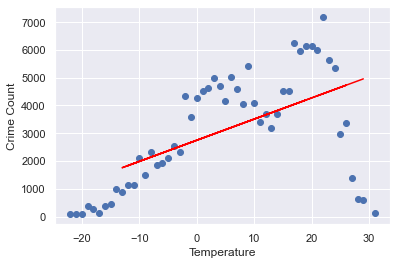

In [694]:
#Plot Predictions 
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')
plt.ylabel('Crime Count')
plt.xlabel('Temperature')
plt.show()

In [695]:
#Examine our Model
print(model.coef_)
print(model.intercept_)

[[76.21100295]]
[2747.11427117]


In [696]:
#Check the Model's Accuracy 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1198.5842043261398
Mean Squared Error: 2859354.8907539477
Root Mean Squared Error: 1690.9627112251612


In [697]:
#Analyze the Correlation Between Month and Aggregate Crime Using a Linear Regression Model 
#Assign X and Y Variables 
X = crime_month_index.Month.values.reshape(-1, 1)
y = crime_month_index.AggregateCrime.values.reshape(-1, 1)
#Show Variable Shape
X.shape
y.shape

(12, 1)

In [698]:
#Train, Test,and Split the Data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [699]:
#Create an Instance of the Linear Regression Model
model = LinearRegression()

In [700]:
# Fit/Train the Model
model.fit(X, y)

LinearRegression()

In [701]:
#Use Predict() Method to Generate Predictions
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_test.shape)

(3, 1)
(3, 1)


In [702]:
#Show the Actual Versus Predicted Values 
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,13418,13427.283217
1,10710,13685.576923
2,14466,13491.856643


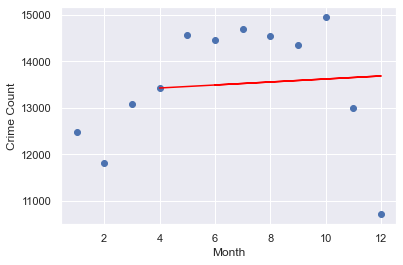

In [703]:
#Plot Predictions 
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')
plt.ylabel('Crime Count')
plt.xlabel('Month')
plt.show()

In [704]:
#Examine our Model
print(model.coef_)
print(model.intercept_)

[[32.28671329]]
[13298.13636364]


In [705]:
#Check the Model's Accuracy 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1319.6678321678326
Mean Squared Error: 3267699.8275180547
Root Mean Squared Error: 1807.6780209755427


In [706]:
#Analyze the Correlation Between Day of the Week and Crime Count Using a Linear Regression Model 
#Assign X and Y Variables 
X = Week_rate_index.Day_Of_Week.values.reshape(-1, 1)
y = Week_rate_index.AggregateCrime.values.reshape(-1, 1)
#Show Variable Shape
X.shape
y.shape

(7, 1)

In [707]:
#Train, Test,and Split the Data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [708]:
#Create an Instance of the Linear Regression Model
model = LinearRegression()

In [709]:
# Fit/Train the Model
model.fit(X, y)

LinearRegression()

In [710]:
#Use Predict() Method to Generate Predictions
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_test.shape)

(2, 1)
(2, 1)


In [711]:
#Show the Actual Versus Predicted Values 
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,21989,22407.714286
1,23533,24279.857143


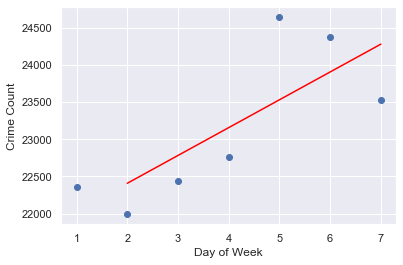

In [712]:
#Plot Predictions 
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')
plt.ylabel('Crime Count')
plt.xlabel('Day of Week')
plt.show()

In [713]:
#Examine our Model
print(model.coef_)
print(model.intercept_)

[[374.42857143]]
[21658.85714286]


In [714]:
#Check the Model's Accuracy 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 582.785714285712
Mean Squared Error: 366558.6224489771
Root Mean Squared Error: 605.4408496698725


In [715]:
#Analyze the Correlation Between Hour of the Day and Crime Count Using a Linear Regression Model 
#Assign X and Y Variables 
X = hour_crime_rate_index.Hour.values.reshape(-1, 1)
y = hour_crime_rate_index.AggregateCrime.values.reshape(-1, 1)
#Show Variable Shape
X.shape
y.shape

(24, 1)

In [716]:
#Train, Test,and Split the Data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [717]:
#Create an Instance of the Linear Regression Model
model = LinearRegression()

In [718]:
# Fit/Train the Model
model.fit(X, y)

LinearRegression()

In [719]:
#Use Predict() Method to Generate Predictions
y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_test.shape)

(5, 1)
(5, 1)


In [720]:
#Show the Actual Versus Predicted Values 
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,7047,5274.593913
1,7766,7454.771304
2,2856,5741.774783
3,6424,6987.590435
4,3777,5586.047826


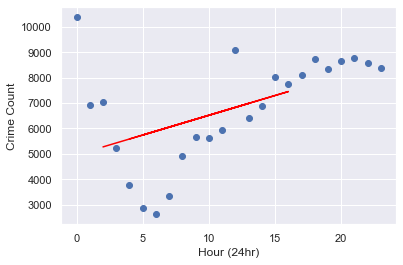

In [721]:
#Plot Predictions 
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')
plt.ylabel('Crime Count')
plt.xlabel('Hour (24hr)')
plt.show()

In [722]:
#Examine our Model
print(model.coef_)
print(model.intercept_)

[[155.72695652]]
[4963.14]


In [723]:
#Check the Model's Accuracy 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1468.4095652173914
Mean Squared Error: 3031254.189853309
Root Mean Squared Error: 1741.0497379033459
